## Fixed Charge Network Flow Problem

**Given:**

* A directed graph $G=(N,A)$  with a source node $s$
* A demand vector $b \in \mathbb{Z}^{|N|}$ such that $b_s > 0$,\
$$b_i \le 0, \forall i \in N, i \not =\{s\}$$ and $$\sum_{i \in N} b_i=0$$ 
* A capacity vector $u \in \mathbb{Z}^{|A|}$ 
* A cost vector $c \in \mathbb{Z}^{|A|}$ representing the arcs activation cost

**Find**

A *feasible flow vector* $x$:

$$
\sum_{(i,j) \in \delta^+(i)} x_{ij} - \sum_{(j,i) \in \delta^-(i)} x_{ji}= b_i, \; i \in N
$$

$$
0 \le x_{ij} \le u_{ij}, \; (i,j) \in A
$$

$0 \le x \le u$ that  the sum of the costs of activated arcs


## Example

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import gurobipy as gb

%matplotlib inline

In [2]:
G = nx.DiGraph()

In [3]:
G.add_nodes_from(['s','a','b','c','d','t'])

In [4]:
G.add_edge ('s', 'a', capacity = 10, activation =  100)
G.add_edge ('s', 'b', capacity = 30, activation = 1)
G.add_edge ('a', 'b', capacity = 55, activation =  5)
G.add_edge ('b', 'c', capacity = 28, activation =  150)
G.add_edge ('a', 'c', capacity = 62, activation =  5)
G.add_edge ('a', 'd', capacity = 34, activation =  130)
G.add_edge ('b', 'd', capacity = 73, activation =  100)
G.add_edge ('c', 'd', capacity = 45, activation =  10)
G.add_edge ('c', 't', capacity = 32, activation =  3)
G.add_edge ('d', 't', capacity = 12, activation =  200)

print (G.edges(data=True))

[('s', 'a', {'capacity': 10, 'activation': 100}), ('s', 'b', {'capacity': 30, 'activation': 1}), ('a', 'b', {'capacity': 55, 'activation': 5}), ('a', 'c', {'capacity': 62, 'activation': 5}), ('a', 'd', {'capacity': 34, 'activation': 130}), ('b', 'c', {'capacity': 28, 'activation': 150}), ('b', 'd', {'capacity': 73, 'activation': 100}), ('c', 'd', {'capacity': 45, 'activation': 10}), ('c', 't', {'capacity': 32, 'activation': 3}), ('d', 't', {'capacity': 12, 'activation': 200})]


In [5]:
demand_b = {'s':40, 'a':0,'b':0,'c':0,'d':0,'t':-40}

### Remember
$\sum_{i \in N} b_i$ **must** be equal to zero 

In [6]:
for i,j in G.edges():
    print (i, j)

s a
s b
a b
a c
a d
b c
b d
c d
c t
d t


In [7]:
pos = nx.shell_layout(G)

edge_lab = {(i,j):[G[i][j]['capacity'], 
               G[i][j]['activation']] for i, j in G.edges()}

node_lab = {i:demand_b[i] for i in G.nodes()}

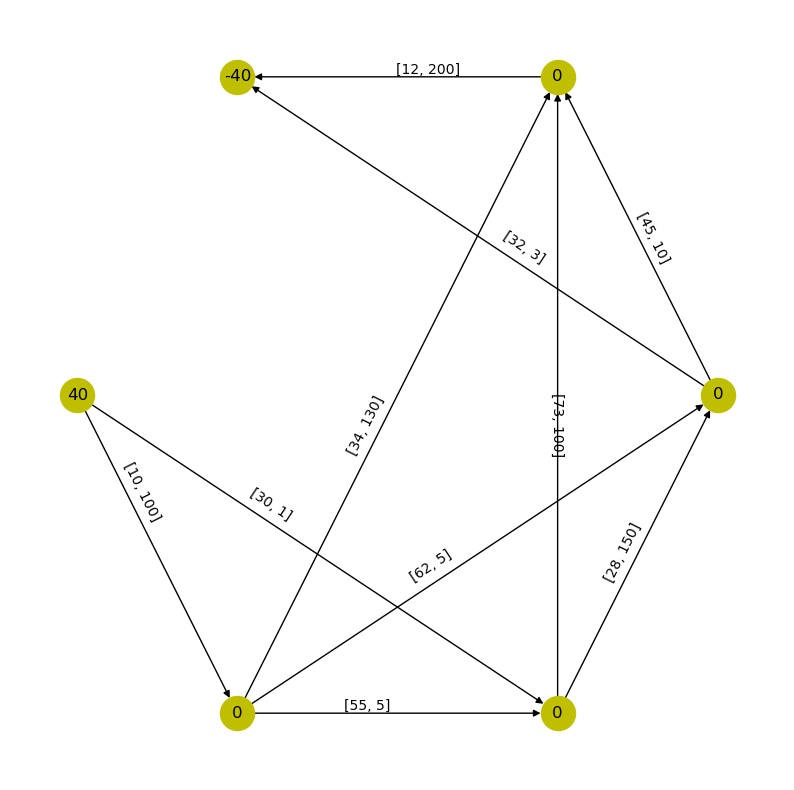

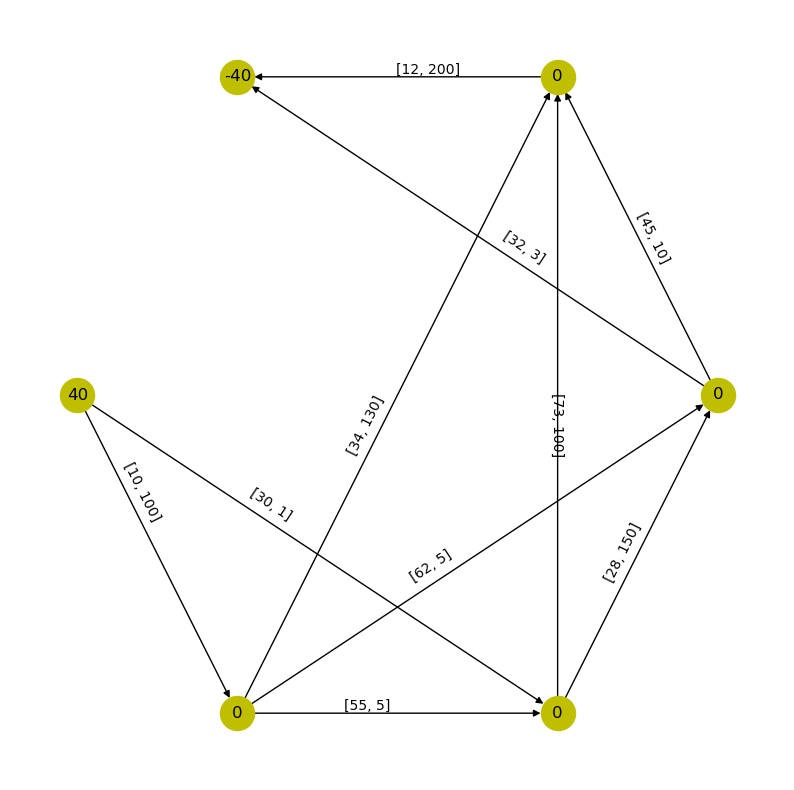

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))


nx.draw_networkx_edge_labels (G, pos, label_pos=0.4, edge_labels=edge_lab, verticalalignment='bottom')
nx.draw_networkx_labels (G,pos, labels=node_lab)

nx.draw(G, pos, ax, with_labels=False, node_size=600, node_color='y')

plt.show()

## Variables

In [10]:
fixedcharge = gb.Model('Fixed Charge Network Problem')

x = fixedcharge.addVars(G.edges(),
                        vtype=gb.GRB.CONTINUOUS, 
                        name='x')

Set parameter Username
Set parameter LicenseID to value 2583204
Academic license - for non-commercial use only - expires 2025-11-13


In [11]:
y = fixedcharge.addVars(G.edges(), 
                        vtype=gb.GRB.BINARY, 
                        name='y')

In [12]:
fixedcharge.update()
fixedcharge.write('fixedcharge.lp')

## Objective function

In [13]:
y

{('s', 'a'): <gurobi.Var y[s,a]>,
 ('s', 'b'): <gurobi.Var y[s,b]>,
 ('a', 'b'): <gurobi.Var y[a,b]>,
 ('a', 'c'): <gurobi.Var y[a,c]>,
 ('a', 'd'): <gurobi.Var y[a,d]>,
 ('b', 'c'): <gurobi.Var y[b,c]>,
 ('b', 'd'): <gurobi.Var y[b,d]>,
 ('c', 'd'): <gurobi.Var y[c,d]>,
 ('c', 't'): <gurobi.Var y[c,t]>,
 ('d', 't'): <gurobi.Var y[d,t]>}

In [14]:
nx.get_edge_attributes(G, 'activation')

{('s', 'a'): 100,
 ('s', 'b'): 1,
 ('a', 'b'): 5,
 ('a', 'c'): 5,
 ('a', 'd'): 130,
 ('b', 'c'): 150,
 ('b', 'd'): 100,
 ('c', 'd'): 10,
 ('c', 't'): 3,
 ('d', 't'): 200}

In [15]:
y.prod(nx.get_edge_attributes(G, 'activation'))

<gurobi.LinExpr: 100.0 y[s,a] + y[s,b] + 5.0 y[a,b] + 5.0 y[a,c] + 130.0 y[a,d] + 150.0 y[b,c] + 100.0 y[b,d] + 10.0 y[c,d] + 3.0 y[c,t] + 200.0 y[d,t]>

In [16]:
fixedcharge.setObjective(y.prod(nx.get_edge_attributes(G, 'activation')), \
                         gb.GRB.MINIMIZE)

In [17]:
fixedcharge.write('fixedcharge.lp')

## Balance constraints

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

nx.draw(G, pos, ax, with_labels=True, node_size=600, node_color='y')

In [19]:
G.out_edges('a')

OutEdgeDataView([('a', 'b'), ('a', 'c'), ('a', 'd')])

In [20]:
x.sum('a', G.out_edges('a'))

<gurobi.LinExpr: x[a,b] + x[a,c] + x[a,d]>

In [21]:
x.sum(G.in_edges('a'), 'a')

<gurobi.LinExpr: x[s,a]>

In [22]:
fixedcharge.addConstrs((x.sum(i, G.out_edges(i)) - (x.sum(G.in_edges(i), i)) == 
                        demand_b[i] for i in G.nodes()), name='Balance')

fixedcharge.update()

fixedcharge.write('fixedcharge.lp')


## Variable Upper Bounds (VUB)

In [23]:
G['s']

AtlasView({'a': {'capacity': 10, 'activation': 100}, 'b': {'capacity': 30, 'activation': 1}})

In [24]:
G['s']['a']

{'capacity': 10, 'activation': 100}

In [25]:
G['s']['a']['capacity']

10

In [26]:
fixedcharge.addConstrs((G[i][j]['capacity'] * y[(i,j)] >= x[(i,j)]
                       for (i,j) in G.edges()), name='VUB')

fixedcharge.update()

fixedcharge.write('fixedcharge.lp')



## Problem solution

In [27]:
fixedcharge.optimize()

Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (mac64[arm] - Darwin 24.3.0 24D70)

CPU model: Apple M3 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 16 rows, 20 columns and 40 nonzeros
Model fingerprint: 0xc4e20c1f
Variable types: 10 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+01]
  Objective range  [1e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [4e+01, 4e+01]
Presolve removed 12 rows and 14 columns
Presolve time: 0.00s
Presolved: 4 rows, 6 columns, 9 nonzeros
Variable types: 3 continuous, 3 integer (3 binary)
Found heuristic solution: objective 694.0000000
Found heuristic solution: objective 564.0000000
Found heuristic solution: objective 559.0000000

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 3: 559 564 694 

Optimal solution found (tolerance 1.00e-04)
Best object

In [28]:
print('Obj: %g' % fixedcharge.objVal)

print ()

for v in fixedcharge.getVars():
    if v.x > 1E-3:
        print ('%s=%g' % (v.varName, v.x), end = ' ')
    
    

Obj: 559

x[s,a]=10 x[s,b]=30 x[a,b]=10 x[b,c]=28 x[b,d]=12 x[c,t]=28 x[d,t]=12 y[s,a]=1 y[s,b]=1 y[a,b]=1 y[b,c]=1 y[b,d]=1 y[c,t]=1 y[d,t]=1 

## Solution representation: activated arcs are in red

_If you experience problem with the drawing functions remove this cell from your notebook_



In [29]:
pos = nx.shell_layout(G)

edge_lab = {i: int(round(x[i].x)) for i in G.edges() if x[i].x > 1E-3}

edge_lab

{('s', 'a'): 10,
 ('s', 'b'): 30,
 ('a', 'b'): 10,
 ('b', 'c'): 28,
 ('b', 'd'): 12,
 ('c', 't'): 28,
 ('d', 't'): 12}

In [30]:


activated_edge = [i for i in G.edges() if x[i].x > 1E-3]
not_activated_edge = [i for i in G.edges() if x[i].x <= 1E-3]

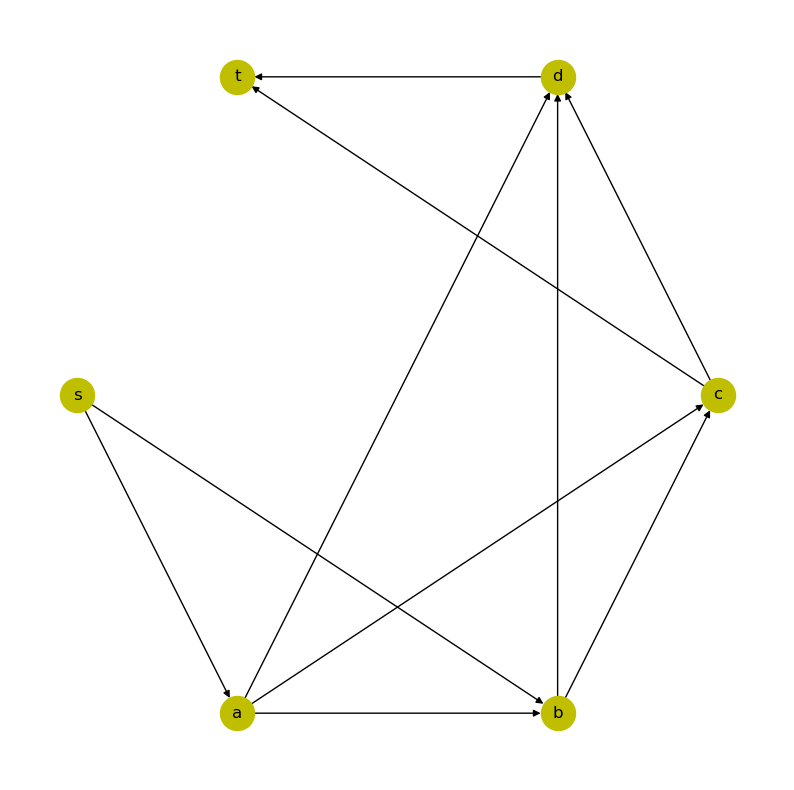

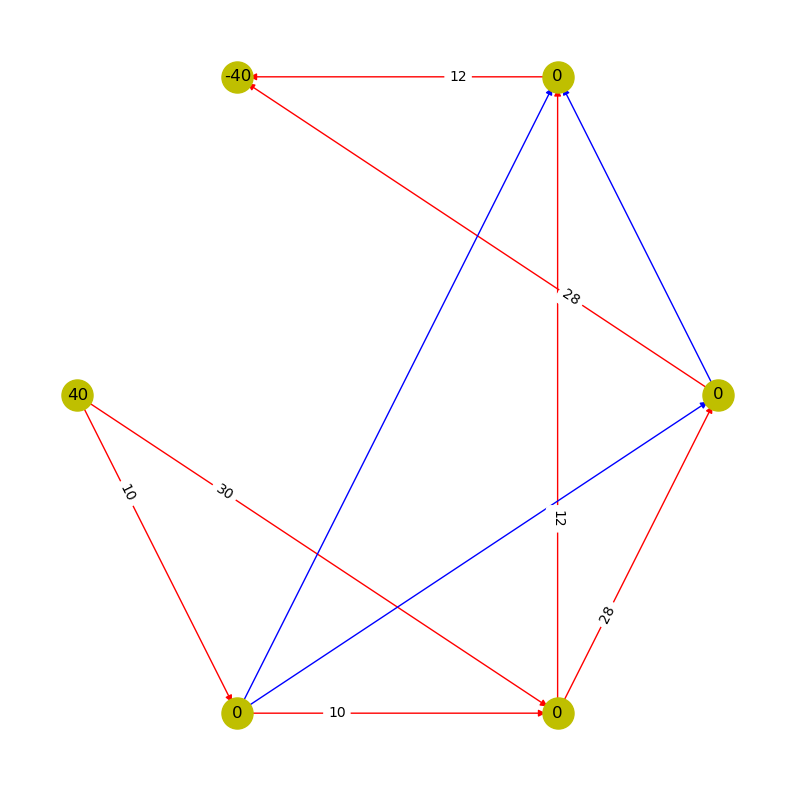

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))


nx.draw(G, pos, ax, alpha=0.0)

nx.draw_networkx_edges (G, pos, edgelist=activated_edge, edge_color='r')
nx.draw_networkx_edges (G, pos, edgelist=not_activated_edge, edge_color='b')
nx.draw_networkx_edge_labels (G, pos, label_pos=0.3,edge_labels=edge_lab)

nx.draw_networkx_labels (G,pos, labels=node_lab)
#nx.draw_networkx_nodes(G,pos,with_labels=True, node_color ='b')
nx.draw_networkx_nodes(G, pos, alpha=1.0, node_size=500, node_color='y')

plt.show()